#### Summary Statistics & Missing-Value Report

In [4]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('..\\data\\sierraleone-bumbuna.csv')
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [6]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


INSIGHT


Columns GHI,DNI, DHI, ModA, ModB and Tamb have high variation(high std). Their mean is relatively in same range. This shows that they have strong relation to each other or they collected from devices at same range. Some measurments should not be negative. They must be changed to zero. 

In [7]:
df.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

The last column (Comments) has null values

In [8]:
df.drop(columns=['Comments'] , inplace=True)

#### Outlier Detection & Basic Cleaning

In [9]:
# Compute Z-scores for each value in the DataFrame
columns_list = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = np.abs(zscore(df[columns_list]))

threshold = 3

outliers = (z_scores > threshold).any(axis=1)

print("Outliers:")
df[outliers].head()

Outliers:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
653,2021-10-30 10:54,814.0,257.0,594.3,878.0,856.0,25.9,85.3,0.5,1.1,0.5,81.4,7.9,1002,0,0.0,50.4,45.6
654,2021-10-30 10:55,826.0,263.5,599.6,883.0,861.0,26.0,85.4,1.7,2.4,0.4,74.6,12.1,1002,0,0.0,51.6,46.6
655,2021-10-30 10:56,851.0,285.0,605.9,912.0,890.0,26.0,84.2,1.6,2.1,0.5,66.4,14.6,1002,0,0.0,52.4,47.0
656,2021-10-30 10:57,823.0,254.8,603.9,878.0,856.0,26.0,85.3,0.8,1.6,0.6,90.2,7.0,1002,0,0.0,53.4,47.7
657,2021-10-30 10:58,810.0,244.5,598.8,864.0,843.0,26.1,85.7,0.6,1.6,0.6,108.5,7.9,1002,0,0.0,54.6,48.6


In [10]:
df_cleaned = df[(z_scores < threshold).all(axis=1)]
df_cleaned.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6


#### Columns with Missing values 

In [11]:
df_cleaned[columns_list].isna().sum()

GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64

In [12]:
df_cleaned[columns_list].isnull().sum()

GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64

Columns have no missing value

#### Export the dataframe

In [13]:
df_cleaned.to_csv("..\\data\\sierraleone-bumbuna_clean.csv", index=False)

In [14]:
df_cleaned.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB'],
      dtype='object')

#### Cleaning Impact

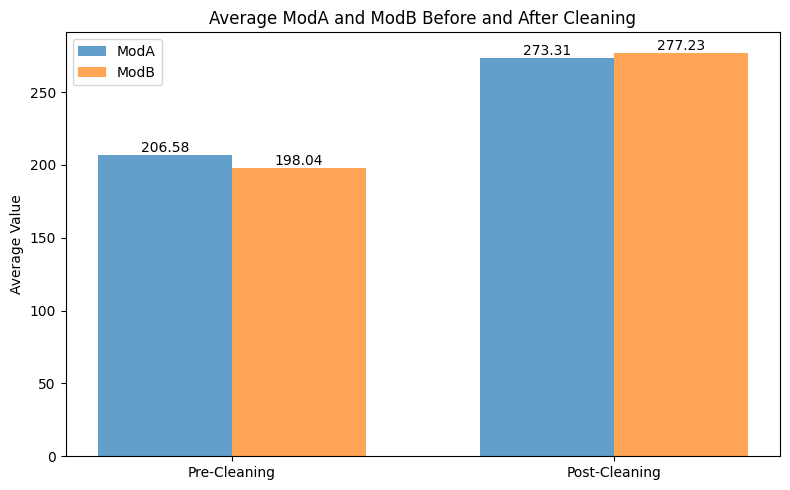

In [15]:
# Group by Cleaning flag
mod_means = df.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()
mod_means['Cleaning'] = mod_means['Cleaning'].map({0: 'Pre-Cleaning', 1: 'Post-Cleaning'})

plt.figure(figsize=(8, 5))
bar_width = 0.35
x = range(len(mod_means))

# Bars
bar1 = plt.bar(x, mod_means['ModA'], width=bar_width, label='ModA', alpha=0.7)
bar2 = plt.bar([i + bar_width for i in x], mod_means['ModB'], width=bar_width, label='ModB', alpha=0.7)

# Add text labels above each bar
for i, b in enumerate(bar1):
    plt.text(b.get_x() + b.get_width()/2, b.get_height(), f'{b.get_height():.2f}', 
             ha='center', va='bottom')

for i, b in enumerate(bar2):
    plt.text(b.get_x() + b.get_width()/2, b.get_height(), f'{b.get_height():.2f}', 
             ha='center', va='bottom')

plt.xticks([i + bar_width / 2 for i in x], mod_means['Cleaning'])
plt.ylabel('Average Value')
plt.title('Average ModA and ModB Before and After Cleaning')
plt.legend()
plt.tight_layout()
plt.show()

#### Correlation & Relationship Analysis

In [16]:
column_list2 = [ 'GHI', 'DNI', 'DHI', 'TModA', 'TModB']

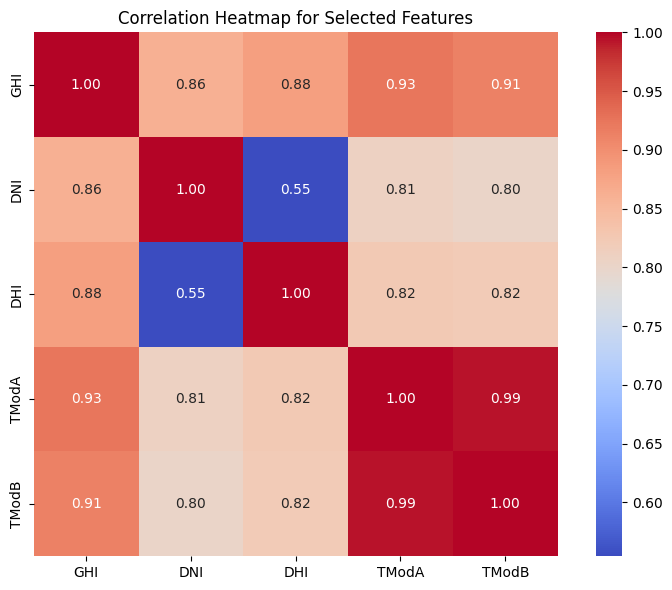

In [17]:
df_subset = df_cleaned[column_list2]

# Compute correlation matrix
corr_matrix = df_subset.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap for Selected Features')
plt.tight_layout()
plt.show()

Strong Correlation
1. TModA - TModB
2. GHI - TModB and TMdA 
The reset columns have moderatly correlated to each other

Scatter Plot

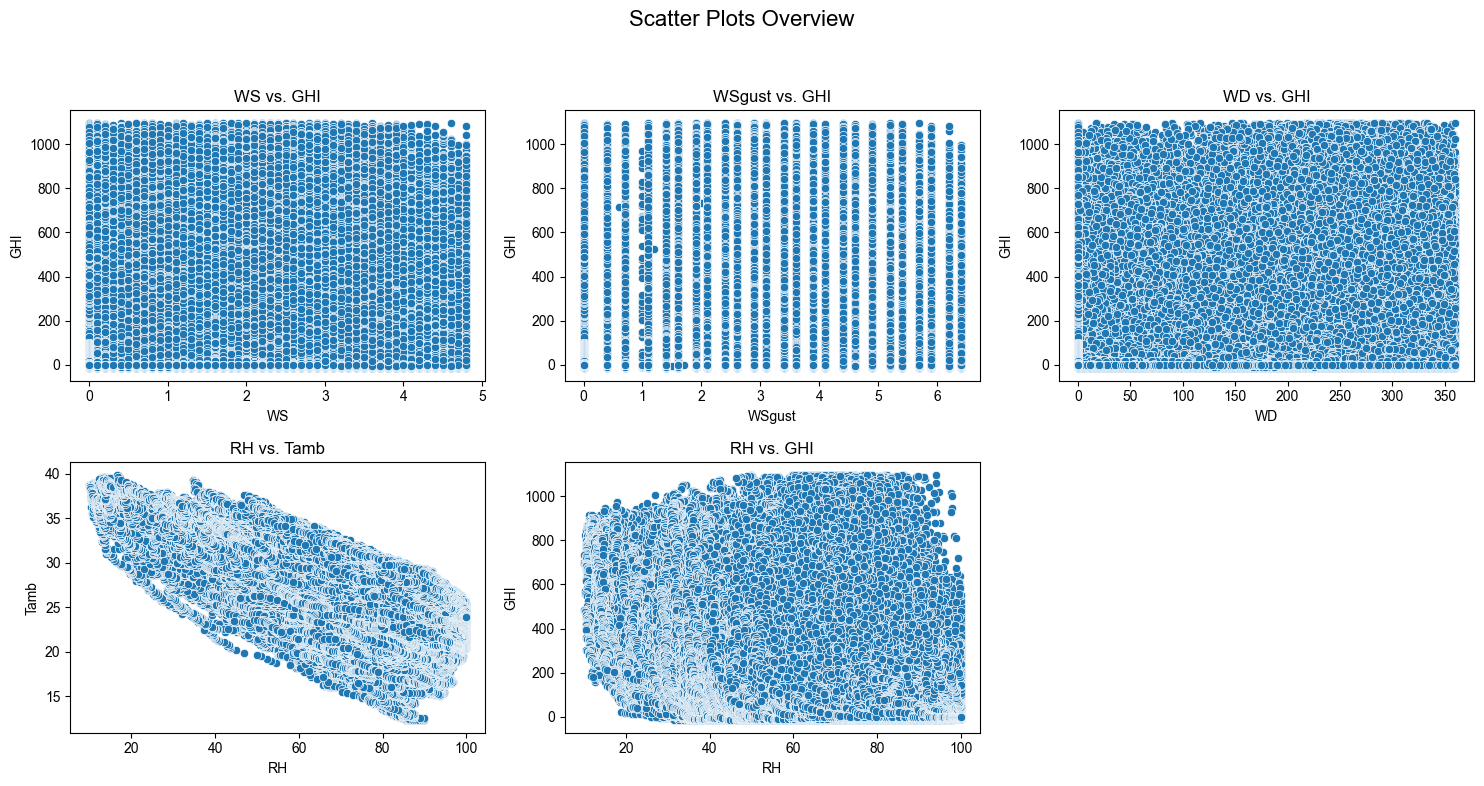

In [18]:
# create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Scatter Plots Overview', fontsize=16)
sns.set(style="whitegrid")

# Plot 1: WS vs. GHI
sns.scatterplot(ax=axes[0, 0], x='WS', y='GHI', data=df_cleaned)
axes[0, 0].set_title('WS vs. GHI')

# Plot 2: WSgust vs. GHI
sns.scatterplot(ax=axes[0, 1], x='WSgust', y='GHI', data=df_cleaned)
axes[0, 1].set_title('WSgust vs. GHI')

# Plot 3: WD vs. GHI
sns.scatterplot(ax=axes[0, 2], x='WD', y='GHI', data=df_cleaned)
axes[0, 2].set_title('WD vs. GHI')

# Plot 4: RH vs. Tamb
sns.scatterplot(ax=axes[1, 0], x='RH', y='Tamb', data=df_cleaned)
axes[1, 0].set_title('RH vs. Tamb')

# Plot 5: RH vs. GHI
sns.scatterplot(ax=axes[1, 1], x='RH', y='GHI', data=df_cleaned)
axes[1, 1].set_title('RH vs. GHI')

# Remove empty subplot (axes[1, 2])
axes[1, 2].axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



When the humidity increases the temperature become decreasing.

Wind & Distribution Analysis

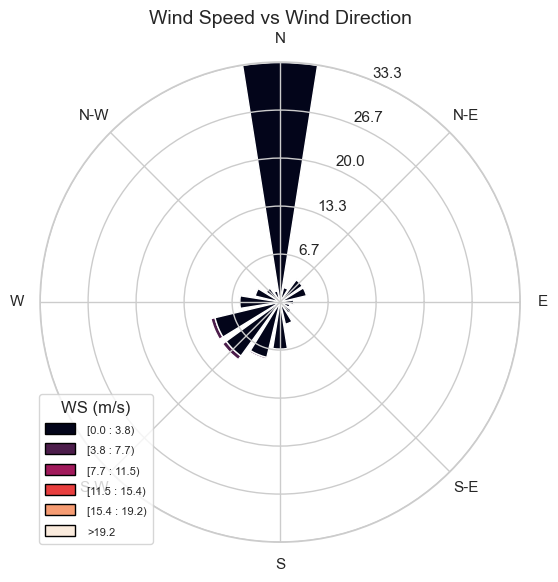

In [19]:
from windrose import WindroseAxes

# windrose axis
fig = plt.figure(figsize=(8, 6))
ax = WindroseAxes.from_ax(fig=fig)

ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')

# Customize
ax.set_legend(title="WS (m/s)")
ax.set_title("Wind Speed vs Wind Direction", fontsize=14)
plt.show()

##### Temperature Analysis


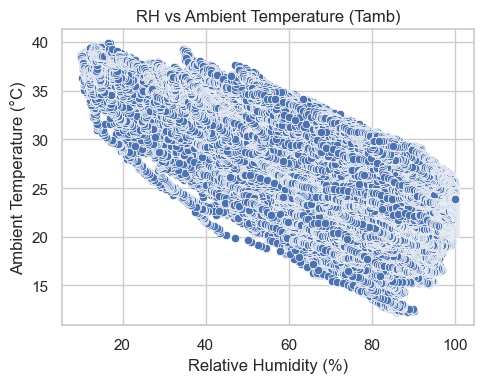

In [20]:
plt.figure(figsize=(5, 4))
sns.scatterplot(x='RH', y='Tamb', data=df_cleaned)
plt.title('RH vs Ambient Temperature (Tamb)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.tight_layout()
plt.show()

High humidity decreases the temprature

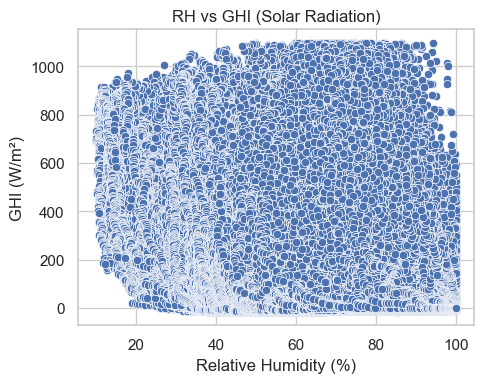

In [21]:
plt.figure(figsize=(5, 4))
sns.scatterplot(x='RH', y='GHI', data=df_cleaned)
plt.title('RH vs GHI (Solar Radiation)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.tight_layout()
plt.show()

Humidty has no effect on Global Horizontal Irradiance

Bubble chart

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

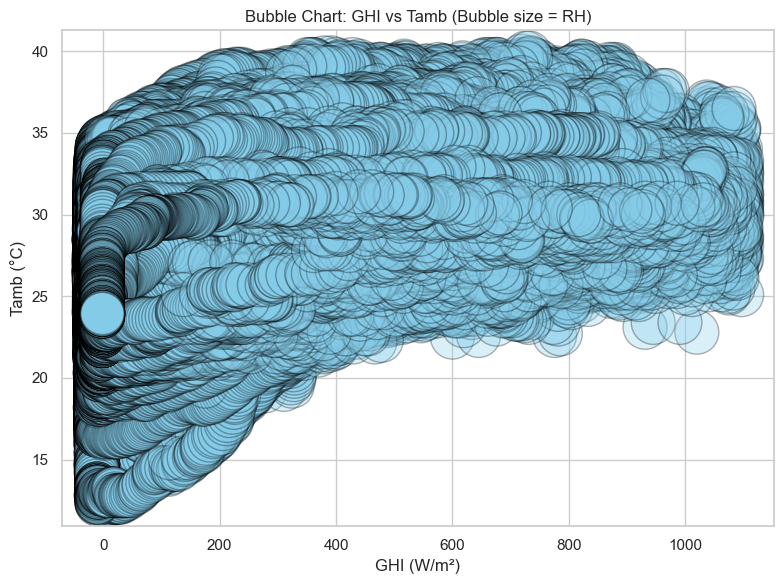

In [23]:
plt.figure(figsize=(8, 6))

# Bubble Chart
plt.scatter(df_cleaned['GHI'], df_cleaned['Tamb'], 
            s=df_cleaned['BP'],         # Bubble size = Relative Humidity
            alpha=0.3, 
            c='skyblue', 
            edgecolors='black')

plt.title("Bubble Chart: GHI vs Tamb (Bubble size = RH)")
plt.xlabel("GHI (W/m²)")
plt.ylabel("Tamb (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()